In [1]:
import pathlib
import numpy as np

from blender import Blender, Blend, Galaxy
from blender.catalog import blend2cat, CATALOG_HEADER

In [2]:
# %load visu.py
import matplotlib.pyplot as plt
import astropy.visualization as viz


def plot_results(blend):
    g1 = blend.gal1
    g2 = blend.gal2
    imglist = [
        blend.img,
        blend.segmap[0],
        blend.segmap[1],
        blend.segmap.sum(axis=0)]
    titlelist = [
        f'blend image {g1.cat_id} - {g2.cat_id}',
        f'{g1.type} - mag:{g1.mag:.2f} - rad:{g1.rad:.2f}',
        f'{g2.type} - mag:{g2.mag:.2f} - rad:{g2.rad:.2f}',
        f'blend segmap {g1.cat_id} - {g2.cat_id}']
    norm = viz.ImageNormalize(blend.img,
                              interval=viz.MinMaxInterval(),
                              stretch=viz.SqrtStretch())
    fig, axes = plt.subplots(1, 4, figsize=(16, 8))
    for i, image in enumerate(imglist):
        if i == 0:
            axes[i].imshow(image, origin='lower', norm=norm)
        else:
            axes[i].imshow(image, origin='lower')
        axes[i].axis('off')
        axes[i].set_title(titlelist[i])


In [3]:
datapath ='data'
cwd = pathlib.Path.cwd()

datapath = cwd / datapath
instamps = datapath / 'candels.npy'
insegmaps = datapath / 'candels_seg.npy'
incat = datapath / 'candels.csv'

In [4]:
blender = Blender(instamps, insegmaps, incat,
                  magdiff=2, raddiff=4, seed=42)

In [5]:
blender.make_cut(blender.cat.mag > 18)
blender.make_cut(blender.cat.mag < 23)
blender.make_cut(blender.cat.galtype != 'irr')

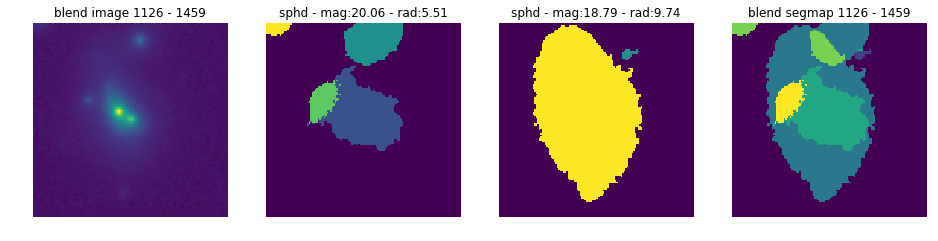

In [6]:
plot_results(blender.next_blend(masked=False))

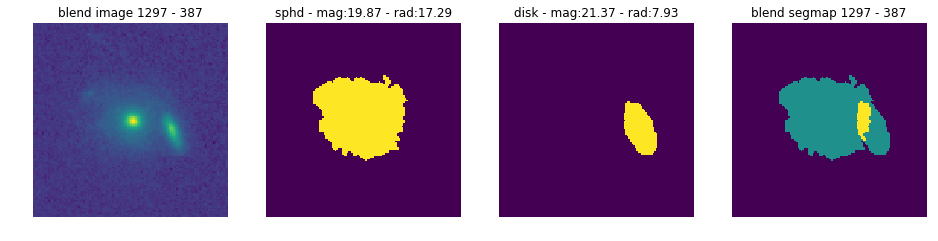

In [24]:
plot_results(blender.next_blend(masked=True))

In [8]:
blender.galaxy(1126)

Galaxy(cat_id=1126, gal_id=64032, mag=20.056095123291016, rad=5.5080599784851065, z=0.524, type='sphd')

In [9]:
def show(img):
    plt.imshow(img, origin='lower')

In [10]:
idx = 4
img = blender.data[idx]
seg = blender.seg[idx]
val = blender.cat.segval[idx]

In [11]:
print(np.unique(seg), val)

[  0 192 207] 719


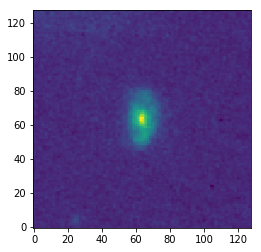

In [12]:
show(img)

In [13]:
import pandas as pd

In [14]:
cat = pd.read_csv(incat)

In [15]:
cat.head()

,ID,filename,galtype,mag,radius,z,segval,RA,DEC,FIELD,...,NBBIAS_F125,NBBIAS_F160,HMAG,MSTAR,SSFR,SPECZ_REDSHIFT,SPECZ_STELLAR_MASS,SPECZ_M_ABS_RF_I_005,SPECZ_M_ABS_RF_I_010,SPECZ_M_ABS_RF_I_020
0,81,ID_000081,disk,21.319714,7.509261,0.51,444,150.187347,2.299129,b'COSMOS ',...,0.654038,0.027455,21.367,9.513,0.775,0.51,10.024,-18.2464,-19.6667,-20.6313
1,140,ID_000140,disk,22.528311,9.707145,0.71,480,150.075810,2.299438,b'COSMOS ',...,0.999341,0.228537,22.618,9.690,-0.329,0.71,9.423,-18.4743,-19.5005,-20.2904
2,965,ID_000965,disk,22.187510,7.470621,0.48,602,150.181844,2.305283,b'COSMOS ',...,1.090101,0.349601,22.273,9.508,-0.613,0.48,9.604,-17.7931,-18.8879,-19.5139
3,1349,ID_001349,disk,21.897583,8.012516,0.84,701,150.129858,2.308877,b'COSMOS ',...,0.915207,0.886085,21.957,9.852,0.540,0.84,10.083,-19.4593,-20.5237,-21.2995
4,1543,ID_001543,disk,21.516315,10.509004,0.86,719,150.125006,2.310288,b'COSMOS ',...,0.971080,0.555951,21.422,10.095,1.019,0.86,10.101,-20.4219,-21.2326,-21.8470
